# Exercise 1: Distributions and Probability

## (a)
Since $A$ and $B$ are disjoint, $P(A\cup B) = P(A) + P(B)$, by properties of probability. But we know in general that $P(A\cup B) = P(A) + P(B) - P(A\cap B)$, so that $P(A\cap B) = 0$. But independence implies $P(A\cap B)=P(A)P(B)$, which is not necessarily 0.

In the coin toss example, this is obvious. If I flip a coin, the event that it lands heads or tails are clearly not independent events. They cannot happen simultaneously! If I told you it was not heads then you would be 100% certain it was tails.

## (b)
The support of $X$ is $supp(X)=[0, 1]$. Recall that the cdf of a uniform random variable implies
$$
F_Z(z) =
\begin{cases}
0 & \text{ if } z < -1 \\
\frac{z + 1}{2} & \text{ if } z\in[-1, 1] \\
1 & \text{ if } z > 1.
\end{cases}
$$

Thus, cdf of $X$ can be obtained as follows. For $x\in[0,1]$,

$$
P(X\leq x) = P(|Z|\leq x) = P(-x\leq Z \leq x) = \int_{-x}^xZf_Z(z)dz
$$

$$
= F_Z(x) - F_Z(-x) = \frac{x + 1}{2} - \frac{-x + 1}{2} = x
$$

so that

$$
f_X(x) =
\begin{cases}
0 \text{ if } x < 0 \\
x \text{ if } x\in[0,1] \\
1 \text{ if } x > 0.
\end{cases}
$$

Differentiating $f_X(x)$ w.r.t $x$, we obtain the pdf,

$$
f_X(x) = 
\begin{cases}
0 & \text{ if } x < 0 \\
1 & \text{ if } x \in [0, 1] \\
0 & \text{ if } x > 1.
\end{cases}
$$

We conclude that $X\sim U[0,1]$.

## (c)
The support of R is $supp(R) = [0,1]$. Area of circle with radius 1 is $\pi$ and with $r$, $\pi r^2$. Since the likelihood of falling into a circular region will be proportional to the area, we can write the cdf as 

$$
F_R(r) = \frac{\pi r^2}{\pi} = r^2.
$$

The pdf is then $f_R(r) = 2r$. Now consider the taxes. The support of $T$ is $supp(T)=[0,\tau]$. 

$$
P(T\leq t) = P(\tau P \leq t) = P(\tau (1- R) \leq t) = P\left(R\geq \frac{\tau - t}{\tau}\right)
$$

$$
= 1 - P\left(R\leq \frac{\tau - t}{\tau}\right) = 1 - \left(\frac{\tau - t}{\tau}\right)^2.
$$

Thus, 

$$
P(T\leq 1/4) = 1 - \left(\frac{\frac{1}{2} - 1/4}{\frac{1}{2}}\right)^2 = 1 - (1 - 1/2)^2 = 3/4.
$$

## (d)
Let $C$ and $D$ be arbitrary sets. Define $A = \{x|f(x)=h, h\in C\}$ and $B=\{y|g(y)=w, w\in D\}$, that is, 
$A=f^{-1}(C)$ and $B=g^{-1}(D)$. Then 

$$
P(H\in C,W\in D) = P(f(X)\in C, g(Y)\in D) = P(X\in f^{-1}(C), Y\in g^{-1}(D)) = P(X\in A,Y\in B)
$$
$$
= P(X\in A)P(Y\in B) = P(f(X)\in f(A))P(g(Y)\in g(B)) = P(H\in C)P(W\in D)
$$

We have just proved that if $X$ and $Y$ are independent, then functions of these random variables are independent.

## (e)
We can take directly from the notes. 

$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{1}{2\sigma^2}(x-\mu)^2\right)
$$

and

Let $(X,Y)$ be a bivariate normal with a $2\times 1$ vector of means $\mu = (\mu_X, \mu_Y)'$ and a $2\times 2$ variance matrix

$$
\Sigma = 
\begin{pmatrix}
\sigma_X^2 & \sigma_{XY} \\
\sigma_{XY} & \sigma_Y^2
\end{pmatrix}.
$$

Then we can write the joint pdf as
$$
f(x,y) = \frac{1}{\sqrt{|(2\pi)^2\Sigma|}}exp\left(-\frac{1}{2}\big((x,y)'-\mu\big)'\Sigma^{-1}\big((x,y)'-\mu\big)\right),
$$
where for a generic matrix $W$, $|W|$ denotes the determinant of $W$ and $W'$ the transpose of $W$. The cdf cannot be written down in a closed form.

# Exercise 2: Theory and Simulation

## (a)

$$
E[X] = 1\cdot p + 0\cdot(1-p) = p = 1/4
$$

and

$$
Var[X] = E[X^2] - E[X]^2 = E[X] - E[X]^2 = E[X](1-E[X]) = p(1-p) = 3/16.
$$

## (b)

In [1]:
N = 25
p = 0.25
set.seed(210)

sample = rbinom(n=N, size=1, prob=p)
c(mean(sample), var(sample))

[1] 0.3200000 0.2266667

The answers are very close to our analytic findings. But let's do the same exercise for $N=10000$.

In [2]:
N = 10000
p = 0.25
set.seed(210)

sample = rbinom(n=N, size=1, prob=p)
c(mean(sample), var(sample))

[1] 0.2494000 0.1872184

Now the answers are nearly identical to our analyical findings.

## (c)

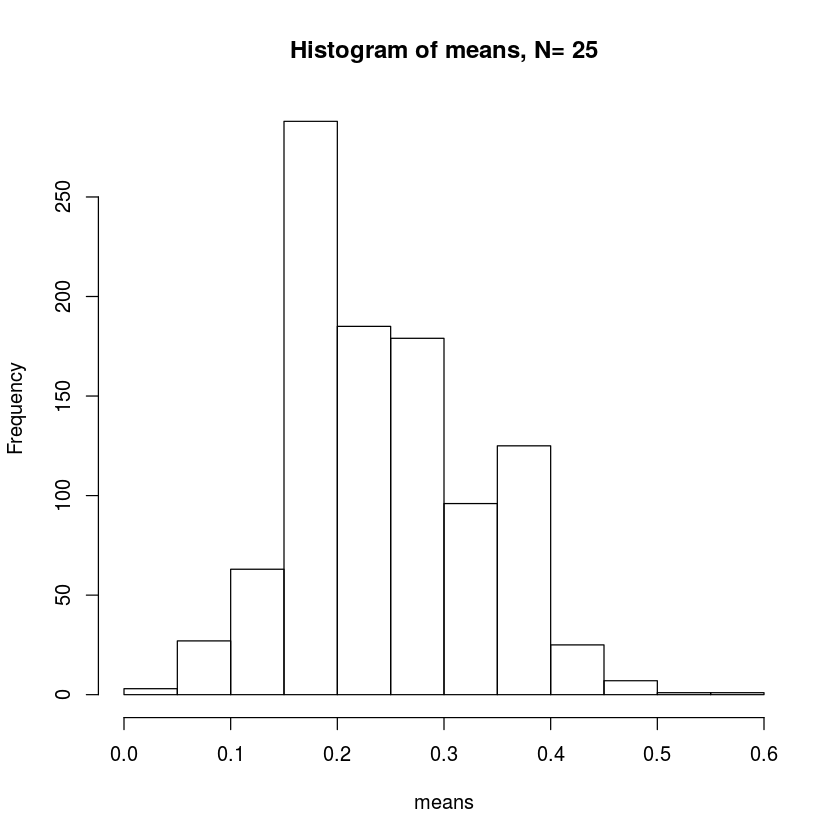

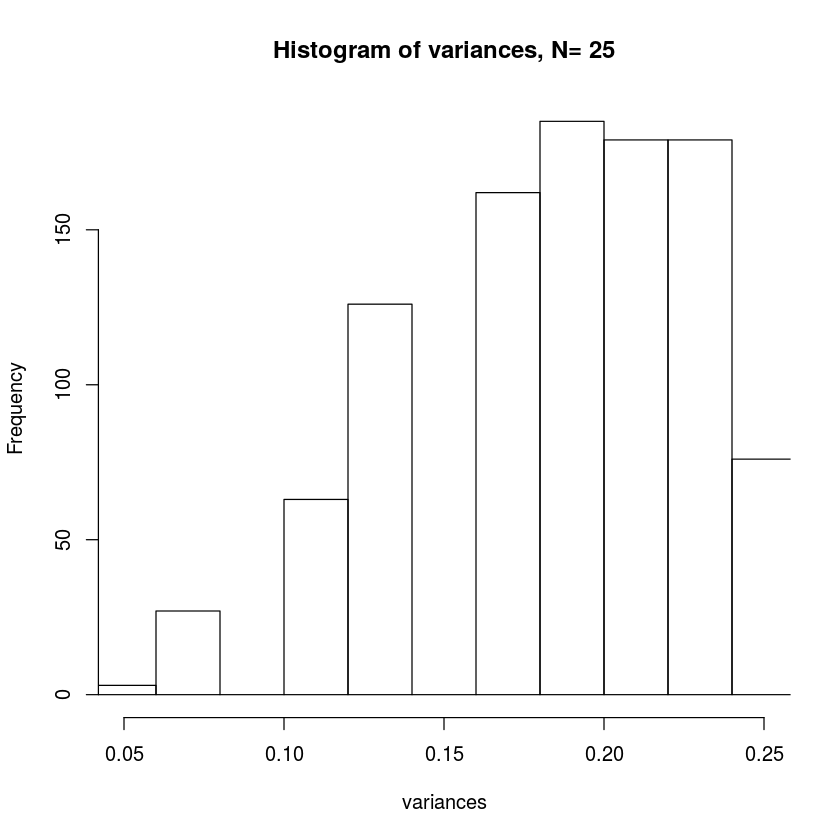

In [3]:
K = 1000
N = 25
p = 0.25
set.seed(210)

means = c()
variances = c()

for (k in 1:K) {
    sample = rbinom(n=N, size=1, prob=p)
    means = c(means, mean(sample))
    variances = c(variances, var(sample))
}
hist(means, main=paste("Histogram of means, N=", N), xlim=c(0, 0.6))
hist(variances, main=paste("Histogram of variances, N=", N), xlim=c(0.05, 0.25))

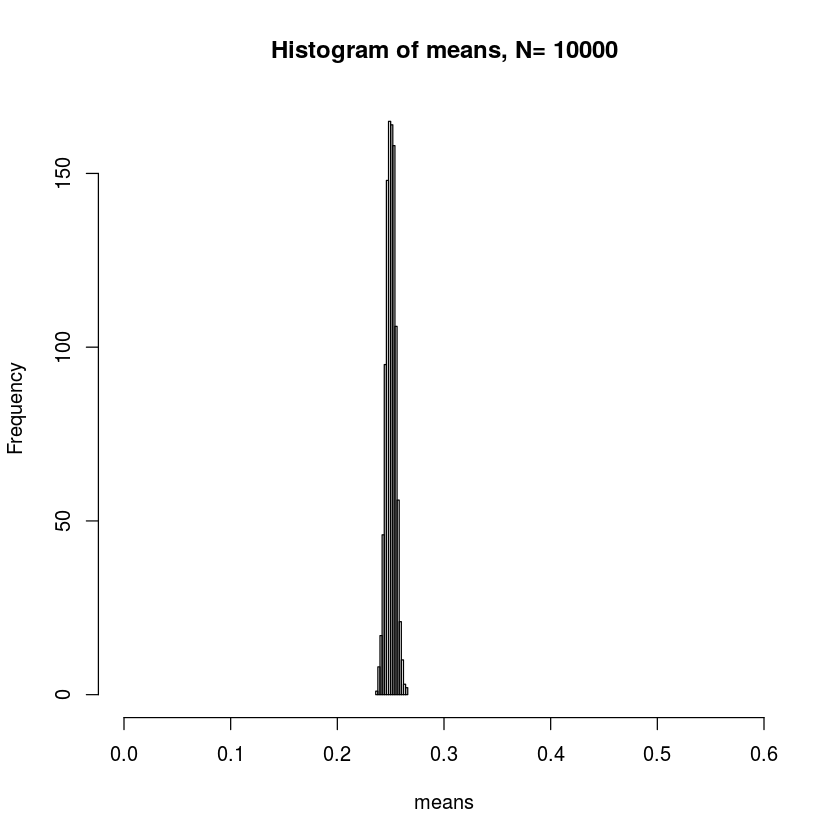

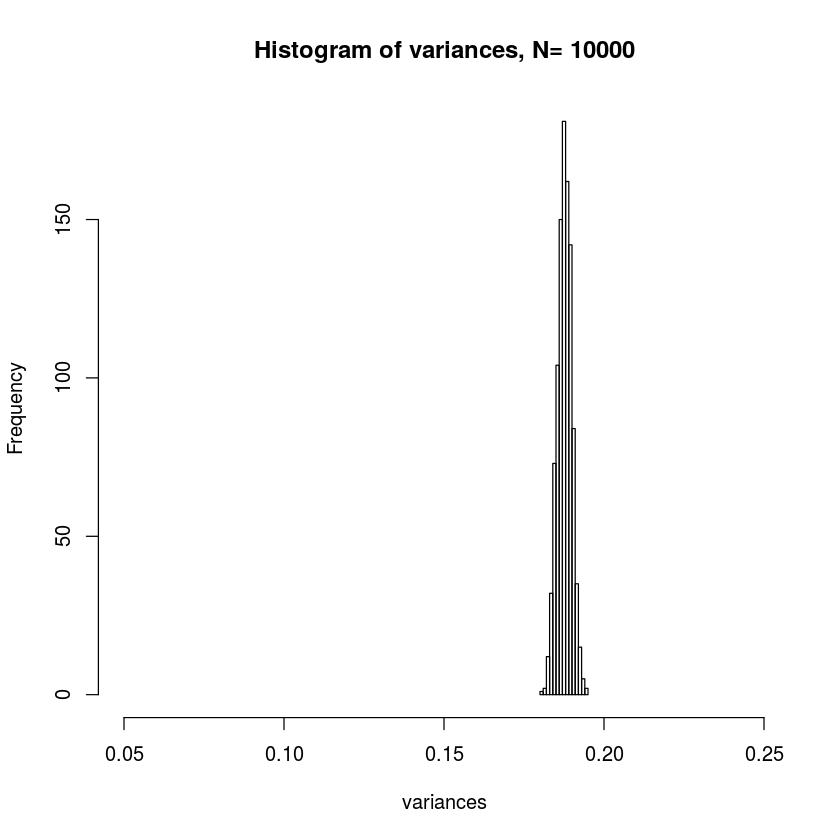

In [4]:
K = 1000
N = 10000
p = 0.25
set.seed(210)

means = c()
variances = c()

for (k in 1:K) {
    sample = rbinom(n=N, size=1, prob=p)
    means = c(means, mean(sample))
    variances = c(variances, var(sample))
}
hist(means, main=paste("Histogram of means, N=", N), xlim=c(0, 0.6))
hist(variances, main=paste("Histogram of variances, N=", N), xlim=c(0.05, 0.25))

So that we see as we grow the sample size that the variance shrinks and the distributions get closer to the population counterparts of the mean and variance of $X$.

# Exercise 3: Missing Wages

## (a)
Wages are drawn from the conditional distribution of $W$ given $A=1$, so that we can represent it with the pdf $f_{W|A=1}$ or cdf $F_{W|A=1}$. Thus, if $W$ is not independent of $A$, then the data is not drawn from the marginal distribution of $W$ and it will be hard to make inferences about this marginal distribution given the selection present in our sample.

## (b)
What we want is $E[W]$ but we "observe" $E[W|A=1]$. Thus, if $E[W|A=1] = E[W]$, i.e., that $W$ is mean independent of $A$, then we could learn about $E[W]$. Other acceptable answers are that $W$ is independent of $A$ (which implies mean independence). Still more advanced answers could be that $E[W|C=c,A=1] = E[W|C=c]$ so that we could recover $E[W]$ using the following:

$$
E[W] = \int_CE[W|C=c]f_C(c)dc = \int_CE[W|C=c,A=1]f_C(c)=\int_CE[W|C=c,A=1]\frac{f_{C|A=1}(c)P(A=1)}{P(A=1|C=c)}dc.
$$

Notice that we observe everything in the far right expression provided we have observations of $W$ for each $c$ in the support of $C$, i.e., for each $c$ such that $f_C(c)>0$. Essentially, this expression says that we can estimate $E[W]$ if we merely reweight the data, putting more weight on observations the less likely we are to observe wages for them.

## (c)

In [5]:
fname = "https://raw.githubusercontent.com/jtorcasso/teaching/master/econ210_fall2017/data/psid_1968.csv"
df = read.csv(fname)

df$wage =  ifelse(df$inc_labor==0 | df$hours==0, NaN, df$inc_labor/df$hours)
df$A = ifelse(is.nan(df$wage), 0, 1)

mean1 = mean(df[df$A==1 & df$male==0, "hhchildren"])
mean0 = mean(df[df$A==0 & df$male==0, "hhchildren"])
c(mean1, mean0)

[1] 1.396947 2.138989

We see that women out of the workforce (for whom we don't observe wages) tend to have more children. You can check other years and you should find the same trend. What we have shown is that women in the workforce are different than women not in the workforce so that it is likely their wages are also different.

Women with higher opportunity costs of time (i.e., higher wages) will tend to have more children because they have more income, but they will also have less children to the degree that producing children is time intensive. If quality of children can substitute for quantity and there are goods inputs like day care that the mother can buy to substitute for her own time, then she may prefer to have fewer children. As a result, my guess would be that higher wage women tend to have fewer children and therefore that the observed wages will tend to be higher than the wages of those women not in the workforce.

To help bolster my argument I could show that the women in the workforce tend to be more educated (which should mean they have higher wages). Let's check this below.

In [6]:
mean1 = mean(df[df$A==1 & df$male==0, "edu"])
mean0 = mean(df[df$A==0 & df$male==0, "edu"])
c(mean1, mean0)

[1] 12.05344 11.60289

Indeed, we have that women in the workforce have on average almost half a year more years of schooling.

# Exercise 4: Labor Supply and Demand

## (a)
Setting supply equal to demand we have

$$
a_0 + a_1L + U = b_0 + b_1L + b_2K + V
$$

so that, solving for $L$, we obtain

$$
L = \frac{b_0 - a_0 - U + b_2K + V}{a_1 - b_1}
$$

## (b)
$$
E[L] = \frac{b_0-a_0}{a_1-b_1} + \frac{b_2}{a_1-b_1}\mu_K
$$

## (c)

$$
Var[L] = \frac{1}{(a_1-b_1)^2}\left(\sigma_U^2 + b_2^2\sigma_K^2 + \sigma_V^2 - 2b_2\sigma_{UK} - 2\sigma_{UV} + 2b_2\sigma_{KV}\right)
$$

## (d)
$$
Cov[L,U] = \frac{1}{a_1-b_1}\left(-\sigma_U^2 + b_2\sigma_{UK} + \sigma_{VU}\right)
$$

so that when $\sigma_{UK}=\sigma_{VU}=0$ and $a_1=1$ and $b_1=2$, then $Cov[L,U] = \sigma_U^2>0$.

## (e)
$$
\frac{Cov[L,W]}{Var[L]} = \frac{Cov[L, a_0 + a_1L + U]}{Var[L]} = a_1 + \frac{Cov[L,U]}{Var[L]} = a_1 + \frac{\sigma_U^2}{Var[L]} > a_1
$$